## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 09 : Algoritma Partisi </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [124]:
import datetime
import uuid

myName = "Rendy Wirawan Tamrin"
myNIM = "00000053580"

In [4]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Start: 		2023-05-03 22:12:58.895530
Device ID: 	fd2f5eab-e9c4-11ed-bdeb-088fc3234331



---

### Dataset yang dipakai:

1. Sign Language MNIST – sumber : https://www.kaggle.com/datasets/datamunge/sign-language-mnist?select=sign_mnist_train
2. Students Adaptability Level in Online Education – sumber : https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education

---

### Hasil kerja

## K-Means Clustering

#### Import Libraries

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#### Generate a two-dimensional data with 4 distinct blobs

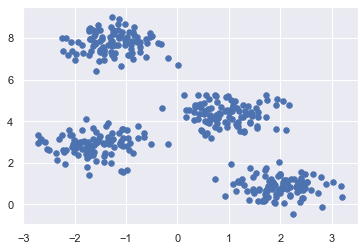

In [11]:
from sklearn.datasets._samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=30)

#### Pick out the four clusters with K-Means

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


#### Visualize the result

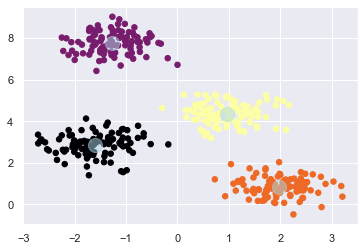

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='inferno')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='lightblue', s=200, alpha=0.5)

#### K-Means Algorithm Implementation: Expectation-Maximization

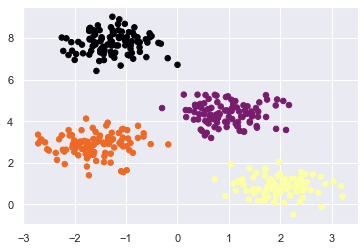

In [14]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=30, cmap='inferno')

#### Issues to be aware of when using E-M Procedure: The globally optimal result may not be achieved

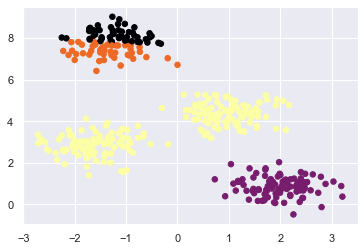

In [15]:
centers, labels = find_clusters(X, 4, rseed=20)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='inferno')

From the visualization above, we can see that the E–M approach has converged, but has not converged to a globally optimal configuration

#### The number of clusters must be selected beforehand 

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


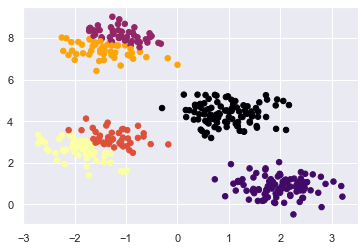

In [16]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='inferno')

#### The boundaries between k-means cluster will always be linear, which means that it will fail for more complicated boundaries

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(400, noise=.06, random_state=0)

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


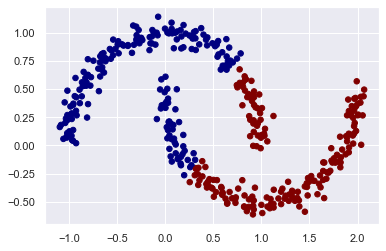

In [18]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='jet')

c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Rendy\anaconda3\envs\data\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


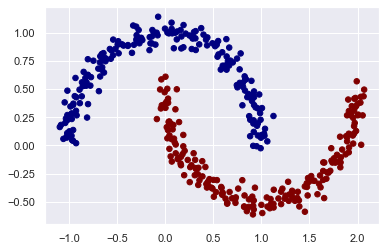

In [19]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='jet')

## K-Means on Digits

#### Importing Libraries

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split

#### Load train data

In [21]:
train = pd.read_csv("sign_mnist_train.csv")
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [22]:
print("Shape: {}".format(train.shape))

Shape: (27455, 785)


#### Load test data

In [23]:
test = pd.read_csv("sign_mnist_test.csv")
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [24]:
print("Shape: {}".format(test.shape))

Shape: (7172, 785)


#### Split data

In [25]:
X_train = train.drop(labels=["label"], axis = 1) 
y_train = train["label"]

X_test = test.drop(labels=["label"], axis = 1) 
y_test = test["label"]

print("Shape of x_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (27455, 784)
Shape of y_train: (27455,)

Shape of x_test: (7172, 784)
Shape of y_test: (7172,)


#### Perform Clustering

In [26]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_train)
kmeans.cluster_centers_.shape

(10, 784)

#### Visualize The Cluster Centers

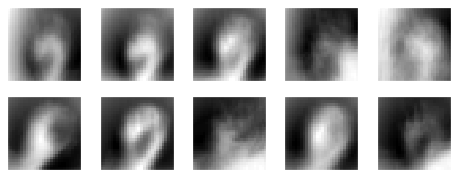

In [27]:
fig, ax = plt.subplots(2, 5, figsize = (8, 3))
centers = kmeans.cluster_centers_.reshape(10, 28, 28)

for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

#### Matching each learned cluster label with the true labels found in them

In [28]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i).flatten()
    labels[mask] = mode(y_train[mask.reshape(-1)])[0].ravel()[0]

C:\Users\Rendy\AppData\Local\Temp\ipykernel_14796\2493370803.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_train[mask.reshape(-1)])[0].ravel()[0]


#### Check the Accuracy

In [29]:
# Compute the accuracy of the clustering
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, labels)
print('Accuracy Score:', acc)

Accuracy Score: 0.14314332544163177


#### Evaluate model with Confusion Matrix

Text(89.18, 0.5, 'predicted label')

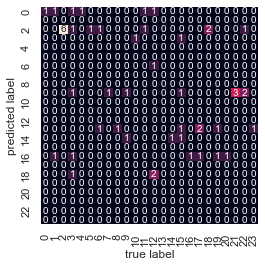

In [30]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_train[:50], labels[:50])
sns.heatmap(mat.T, square=True, annot=True, cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

### K-Means for Color Compression

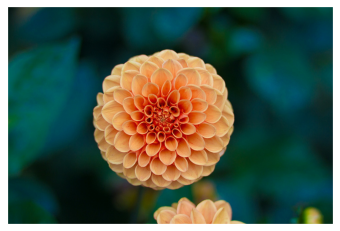

In [32]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)

In [33]:
flower.shape

(427, 640, 3)

#### Reshape the data & Rescale the color

In [34]:
data = flower/255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

#### Visualize Pixels in this Color Space

In [35]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

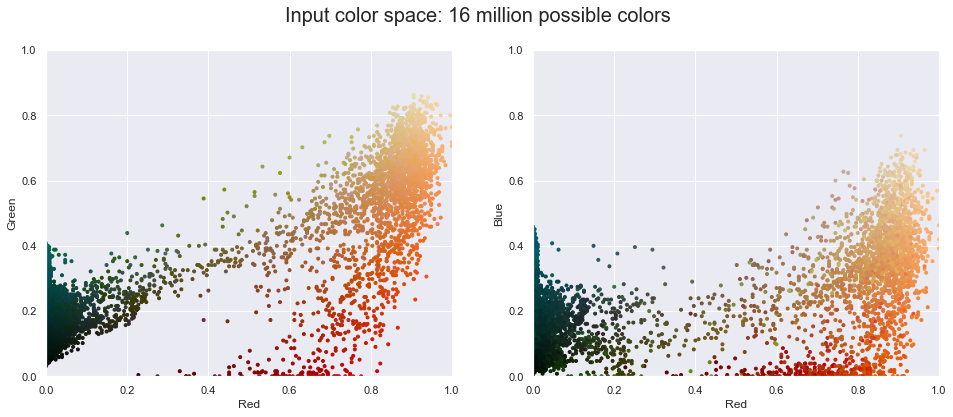

In [36]:
plot_pixels(data, title='Input color space: 16 million possible colors')

#### Reduce 16 million colors to 16 colors with k-means clustering

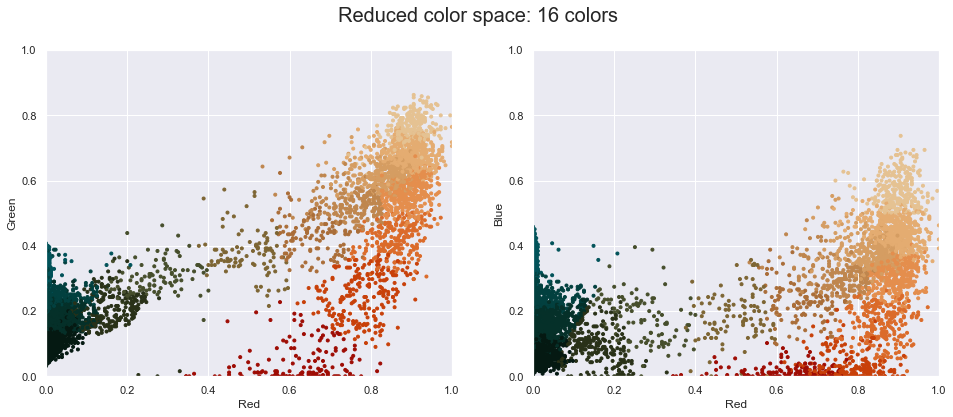

In [37]:
import warnings; warnings.simplefilter('ignore') # Fix NumPy issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

#### Compare the image with 16 million colors vs with 16 colors

Text(0.5, 1.0, '16-color Image')

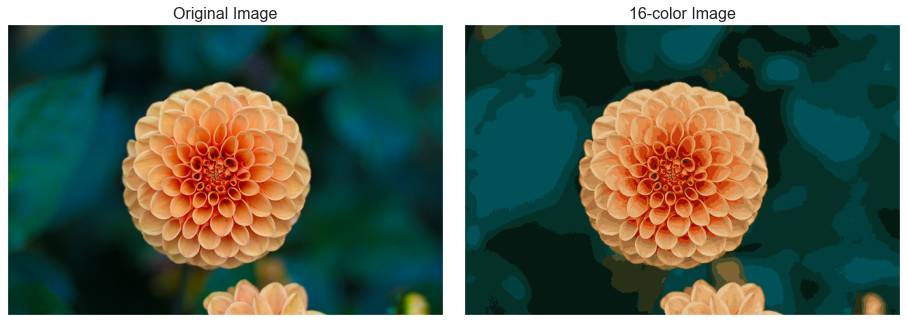

In [38]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16)


### K-Medoids Algorithm

#### Import Libraries

In [39]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

#### Import Dataset

In [75]:
df = pd.read_csv("sign_mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [76]:
df = pd.DataFrame(df[:1000], columns=df.columns)
df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
995,14,203,204,207,208,208,210,212,212,213,...,255,251,254,255,255,253,255,254,253,253
996,12,165,171,176,180,184,188,190,193,196,...,66,44,38,22,15,44,38,4,12,36
997,16,57,62,66,74,93,111,123,129,135,...,0,0,140,156,18,0,0,0,0,0
998,6,187,188,189,189,190,191,192,192,192,...,179,184,194,191,163,127,126,141,147,149
999,13,200,200,199,200,200,200,199,198,198,...,35,27,27,18,12,16,18,25,8,11


In [77]:
features = df.iloc[:, 1:785]
target = df.iloc[:, 0]

print("Shape of the Features: {}".format(features.shape))
print("Shape of the Target: {}".format(target.shape))

Shape of the Features: (1000, 784)
Shape of the Target: (1000,)


#### Scaling data

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [79]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.125000,0.419608,0.462745,0.498039,0.525490,0.502146,0.550201,0.555102,0.578313,0.600000,...,0.811765,0.811765,0.811765,0.811765,0.807843,0.807843,0.807843,0.800000,0.796078,0.792157
1,0.250000,0.607843,0.615686,0.611765,0.611765,0.575107,0.606426,0.595918,0.610442,0.619608,...,0.270588,0.584314,0.501961,0.341176,0.368627,0.639216,0.686275,0.403922,0.529412,0.584314
2,0.083333,0.733333,0.737255,0.737255,0.733333,0.708155,0.722892,0.722449,0.730924,0.733333,...,0.792157,0.788235,0.784314,0.780392,0.776471,0.780392,0.776471,0.764706,0.760784,0.764706
3,0.083333,0.827451,0.827451,0.831373,0.831373,0.811159,0.819277,0.820408,0.819277,0.823529,...,0.921569,0.917647,0.913725,0.905882,0.901961,0.886275,0.882353,0.870588,0.898039,0.639216
4,0.541667,0.643137,0.654902,0.666667,0.674510,0.660944,0.694779,0.693878,0.714859,0.725490,...,0.360784,0.411765,0.411765,0.423529,0.521569,0.639216,0.615686,0.639216,0.643137,0.701961


#### Apply PCA Transformation

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
PCAdf = pd.DataFrame(data=principalComponents, columns=['principal component 1',
                                                   'principal component 2', 'principal component 3'])

datapoints = PCAdf.values
m, f = datapoints.shape
k=3

#### Visualize on a 3D Plane

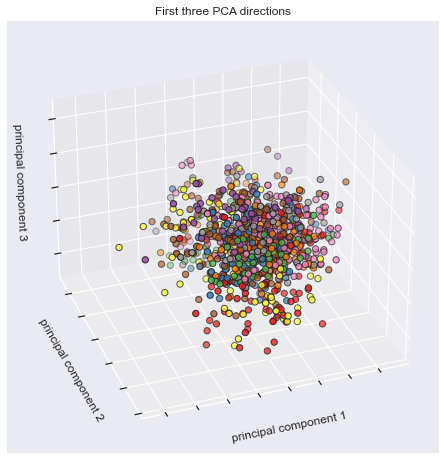

In [81]:
fig = plt.figure(1, figsize=(8,6))
ax = Axes3D(fig,elev=-150, azim = 110)
X_reduced = datapoints
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=target,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("First three PCA directions")
ax.set_xlabel("principal component 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("principal component 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("principal component 3")
ax.w_zaxis.set_ticklabels([])
plt.show()

#### Medoid Initialization

In [82]:
def init_medoids(X, k):
    from numpy.random import choice
    from numpy.random import seed

    seed(1)
    samples = choice(len(X), size=k, replace=False)
    return X[samples, :]

medoids_initial = init_medoids(datapoints,3)
medoids_initial

array([[-0.18984594,  1.34436828, -1.98336367],
       [-0.17560406, -2.85480272,  0.02983023],
       [-4.52902467, -1.48287928,  0.87448496]])

#### Computing the Distances

In [83]:
def compute_d_p(X, medoids, p):
    m = len(X)
    medoids_shape = medoids.shape
    # if a 1-D array is provided, 
    # it will be reshaped to a single row 2-D array
    if len(medoids_shape) == 1:
        medoids = medoids.reshape((1,len(medoids)))
    k = len(medoids)

    S = np.empty((m, k))

    for i in range(m):
        d_i = np.linalg.norm(X[i, :] - medoids, ord=p, axis=1)
        S[i, :] = d_i**p

    return S

S = compute_d_p(datapoints, medoids_initial,2)
S

array([[ 13.5916723 ,   1.6342274 ,  27.60392032],
       [ 11.27101006,  12.77956406,  38.31708706],
       [ 38.60289711,   9.51027078,  25.23335226],
       ...,
       [ 49.93543458,  81.75433949, 138.83625386],
       [ 12.05956513,   7.27257521,  13.93562415],
       [ 26.24218089,  54.22652035,  69.51266497]])

#### Cluster Assignment

In [84]:
def assign_target(S):
    return np.argmin(S, axis=1)

target = assign_target(S)
target

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 2,
       2, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1,
       0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2,
       0, 1, 1, 0, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0,

#### Swap Test

In [85]:
def update_medoids(X, medoids, p):
 
    S = compute_d_p(datapoints, medoids, p)
    target = assign_target(S)

    out_medoids = medoids

    for i in set(target):

        avg_dissimilarity = np.sum(compute_d_p(datapoints, medoids[i], p))

        cluster_points = datapoints[target == i]

        for datap in cluster_points:
            new_medoid = datap
            new_dissimilarity = np.sum(compute_d_p(datapoints, datap, p))

            if new_dissimilarity < avg_dissimilarity:
                avg_dissimilarity = new_dissimilarity
                
                out_medoids[i] = datap

    return out_medoids

#### Check whether the medoids no longer moves and the iteration should be stopped

In [86]:
def has_converged(old_medoids, medoids):
    return set ([tuple(x) for x in old_medoids]) == set([tuple(x) for x in medoids])

#### Putting all together

In [87]:
# Kmedoids Algorithm
def kmedoids(X, k, p, starting_medoids=None, max_steps=np.inf):
    if starting_medoids is None:
        medoids = init_medoids(X, k)
    else:
        medoids = starting_medoids

    converged = False
    target = np.zeros(len(X))
    i = 1
    while (not converged) and (i <= max_steps):
        old_medoids = medoids.copy()

        S = compute_d_p(X, medoids, p)

        target = assign_target(S)

        medoids = update_medoids(X, medoids, p)

        converged = has_converged(old_medoids, medoids)
        i += 1

    return (medoids, target)

results = kmedoids(datapoints, 3, 2)
final_medoids = results[0]
df['clusters'] = results[1]

In [88]:
print(results)

(array([[-0.178284  ,  0.04237574, -0.00240288],
       [-0.39193698, -0.07744452,  0.29563169],
       [-0.24192702, -0.40355329,  0.25268621]]), array([2, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 2,
       1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2,
       2, 1, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2,
       1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0,
       0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0, 2,
       1, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 0

#### Count

In [89]:
def mark_matches(a, b, exact=False):
    assert a.shape ==b.shape
    a_int = a.astype(dtype=int)
    b_int = b.astype(dtype=int)
    all_axes = tuple(range(len(a.shape)))
    assert((a_int ==0) | (a_int == 1) | (a_int == 2)).all()
    assert((b_int ==0) | (b_int == 1) | (b_int == 2)).all()

    exact_matches = (a_int == b_int)
    if exact:
        return exact_matches

    assert exact == False
    num_exact_matches = np.sum(exact_matches)
    if (2*num_exact_matches) >= np.prod (a.shape):
        return exact_matches
    return exact_matches == False

In [92]:
def count_matches(a, b, exact=False):
    matches = mark_matches(a, b, exact=exact)
    return np.sum(matches)

n_matches = count_matches(target, df['clusters'])
print(n_matches, 
      "matches out of", 
      len(data), "data points", 
      "(~ {:.1f}%)".format(100.0 * n_matches / len(target)))

571 matches out of 273280 data points (~ 57.1%)


### K-Modes Algorithm: Unsupervised Learning for Categorical Data

#### Import library

In [93]:
from matplotlib.pyplot import xticks

#### Import dataset

In [94]:
students = pd.read_csv("students_adaptability_level_online_education.csv")
students.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [95]:
students.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [96]:
students.shape

(1205, 14)

In [97]:
students.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [98]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


#### Data Cleaning

In [99]:
# Check if there is a null value
students.isnull().sum()*100/students.shape[0]

Gender                 0.0
Age                    0.0
Education Level        0.0
Institution Type       0.0
IT Student             0.0
Location               0.0
Load-shedding          0.0
Financial Condition    0.0
Internet Type          0.0
Network Type           0.0
Class Duration         0.0
Self Lms               0.0
Device                 0.0
Adaptivity Level       0.0
dtype: float64

In [100]:
# Copy data
students_copy = students.copy()

#### Data Preprocessing with LabelEncoder

In [101]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
students = students.apply(le.fit_transform)
students.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,3,2,1,0,1,1,0,1,2,2,0,2,2
1,1,3,2,1,0,1,0,0,0,2,1,1,1,2
2,1,2,0,0,0,1,1,0,1,2,1,0,1,2
3,1,1,1,1,0,1,1,0,0,2,1,0,1,2
4,1,2,1,1,0,1,1,1,0,1,0,0,1,1


In [102]:
from kmodes.kmodes import KModes

#### Using k-modes with "Cao" initialization

In [103]:
km_cao = KModes(n_clusters=2, init="Cao", n_init=1, verbose=1)
fitClusters_cao = km_cao.fit_predict(students)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 218, cost: 4953.0
Run 1, iteration: 2/100, moves: 19, cost: 4953.0


In [104]:
# Predicted Clusters
fitClusters_cao

array([0, 0, 1, ..., 0, 1, 0], dtype=uint16)

In [105]:
clusterCentroidsDF = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDF.columns = students.columns

In [106]:
# Mode of the clusters
clusterCentroidsDF

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0,1,1,1,0,1,1,0,0,2,1,0,1,2
1,1,3,2,0,0,1,1,0,1,2,1,0,1,1


#### Using K-modes with "Huang" initialization

In [107]:
km_huang = KModes(n_clusters=2, init="Huang", n_init=1, verbose=1)
fitClusters_huang = km_huang.fit_predict(students)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 281, cost: 4974.0


In [108]:
# Predicted Clusters
fitClusters_huang

array([0, 0, 1, ..., 0, 1, 0], dtype=uint16)

#### Choosing K by comparing Cost against each K

In [109]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init="Cao", n_init=1, verbose=1)
    kmode.fit_predict(students)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 5819.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 218, cost: 4953.0
Run 1, iteration: 2/100, moves: 19, cost: 4953.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 181, cost: 4358.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 250, cost: 3904.0
Run 1, iteration: 2/100, moves: 107, cost: 3818.0
Run 1, iteration: 3/100, moves: 62, cost: 3818.0


#### Plotting the data frame

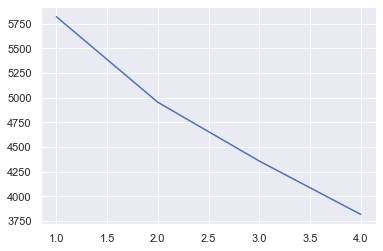

In [110]:
y = np.array([i for i in range(1, 5, 1)])
plt.plot(y,cost)

In [111]:
# Choosing K = 2
km_cao = KModes(n_clusters=2, init = "Cao", n_init=1, verbose=1)
fitClusters_cao = km_cao.fit_predict(students)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 218, cost: 4953.0
Run 1, iteration: 2/100, moves: 19, cost: 4953.0


#### The result after fit the cluster:

In [112]:
fitClusters_cao

array([0, 0, 1, ..., 0, 1, 0], dtype=uint16)

#### Combining the predicted clusters with the original data frame

In [113]:
students = students_copy.reset_index()

In [114]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([students, clustersDf], axis=1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis=1)

In [115]:
combinedDf.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level,cluster_predicted
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate,0
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate,0
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate,1
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate,0
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low,0


#### Cluster Identification:

In [116]:
cluster_0 = combinedDf[combinedDf["cluster_predicted"] == 0]
cluster_1 = combinedDf[combinedDf["cluster_predicted"] == 1]

In [117]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 1204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               818 non-null    object
 1   Age                  818 non-null    object
 2   Education Level      818 non-null    object
 3   Institution Type     818 non-null    object
 4   IT Student           818 non-null    object
 5   Location             818 non-null    object
 6   Load-shedding        818 non-null    object
 7   Financial Condition  818 non-null    object
 8   Internet Type        818 non-null    object
 9   Network Type         818 non-null    object
 10  Class Duration       818 non-null    object
 11  Self Lms             818 non-null    object
 12  Device               818 non-null    object
 13  Adaptivity Level     818 non-null    object
 14  cluster_predicted    818 non-null    uint16
dtypes: object(14), uint16(1)
memory usage: 97.5+ KB


In [118]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 2 to 1203
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               387 non-null    object
 1   Age                  387 non-null    object
 2   Education Level      387 non-null    object
 3   Institution Type     387 non-null    object
 4   IT Student           387 non-null    object
 5   Location             387 non-null    object
 6   Load-shedding        387 non-null    object
 7   Financial Condition  387 non-null    object
 8   Internet Type        387 non-null    object
 9   Network Type         387 non-null    object
 10  Class Duration       387 non-null    object
 11  Self Lms             387 non-null    object
 12  Device               387 non-null    object
 13  Adaptivity Level     387 non-null    object
 14  cluster_predicted    387 non-null    uint16
dtypes: object(14), uint16(1)
memory usage: 46.1+ KB


#### Plotting the result based on attributes

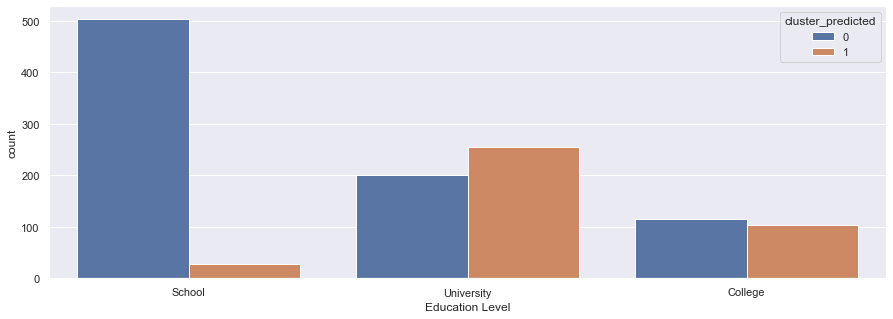

In [119]:
# Education Level
plt.subplots(figsize =(15,5))
sns.countplot(x=combinedDf['Education Level'], 
              order=combinedDf['Education Level'].value_counts().index, hue=combinedDf['cluster_predicted'])
plt.show()

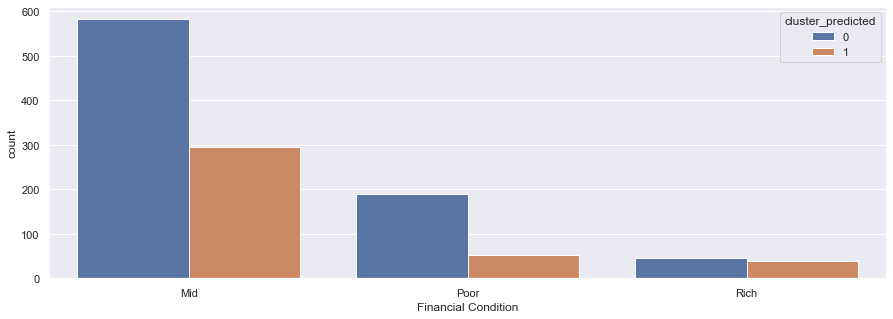

In [120]:
# Financial Condition
plt.subplots(figsize =(15,5))
sns.countplot(x=combinedDf['Financial Condition'], 
              order=combinedDf['Financial Condition'].value_counts().index, hue=combinedDf['cluster_predicted'])
plt.show()

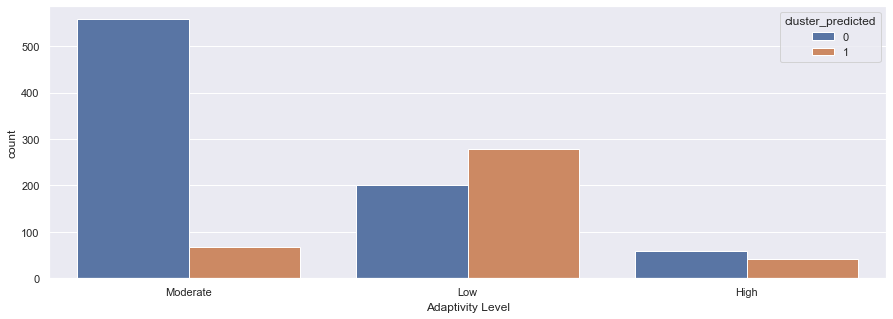

In [121]:
# Adaptivity Level
plt.subplots(figsize =(15,5))
sns.countplot(x=combinedDf['Adaptivity Level'], 
              order=combinedDf['Adaptivity Level'].value_counts().index, hue=combinedDf['cluster_predicted'])
plt.show()

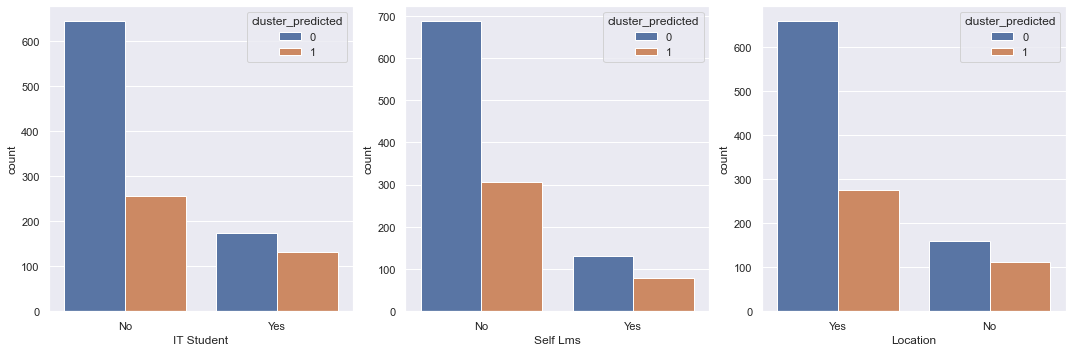

In [122]:
f, axs = plt.subplots(1, 3, figsize = (15, 5))
sns.countplot(x=combinedDf['IT Student'],
              order=combinedDf['IT Student'].value_counts().index,
              hue=combinedDf['cluster_predicted'], ax= axs[0])
sns.countplot(x=combinedDf['Self Lms'],
              order=combinedDf['Self Lms'].value_counts().index,
              hue=combinedDf['cluster_predicted'], ax= axs[1])
sns.countplot(x=combinedDf['Location'],
              order=combinedDf['Location'].value_counts().index,
              hue=combinedDf['cluster_predicted'], ax= axs[2])

plt.tight_layout()
plt.show()

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Terdapat 2 dataset yang digunakan pada week ini, 1 dataset yang berisi data tipe numerikal, dan 1 dataset yang berisi data bertipe kategorikal. Dataset numerikal digunakan untuk melakukan K-Means & K-Medoids Clustering, sedangkan dataset kategorikal digunakan untuk melakukan K-Modes clustering.
    
    1. K-Means Clustering.
    Algoritma clustering ini bekerja dengan membagi data menjadi kelompok yang saling berdekatan atau sebuah cluster berdasarkan kemiripan fitur atau karakteristik tertentu.
    Hasil akurasi yang diberikan sebesar 0.14314332544163177

    2. K-Medoids Clustering.
    Algoritma ini bekerja dengan cara membagi data ke dalam k kelompok atau cluster. K-Medoids sering digunakan dalam clustering data yang mengandung noise atau outlier.
    Hasil akurasi yang diberikan sebesar 57.1%

    3. K-Modes Clustering.
    Algoritma K-Modes bekerja dengan cara memilih k titik acak dari data sebagai pusat cluster awal. K-Modes sering digunakan dalam Clustering untuk data kategorikal.

---

In [125]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Rendy Wirawan Tamrin
NIM: 		00000053580
Time-stamp:	2023-05-04 10:00:21.141476


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [127]:
!jupyter nbconvert --to html "./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week09.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_KelasEL_00000053580_RendyWirawanTamrin_Week09.ipynb to html
[NbConvertApp] Writing 2365080 bytes to IF540_KelasEL_00000053580_RendyWirawanTamrin_Week09.html
